<a href="https://colab.research.google.com/github/princepriyadarshi2017/US-Accidents-EDA/blob/main/US_Accidents_EDA.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# US Accidents Exploratory Data Analysis

Importing Library

In [51]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import folium

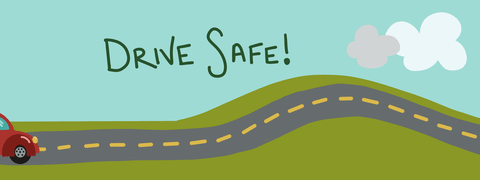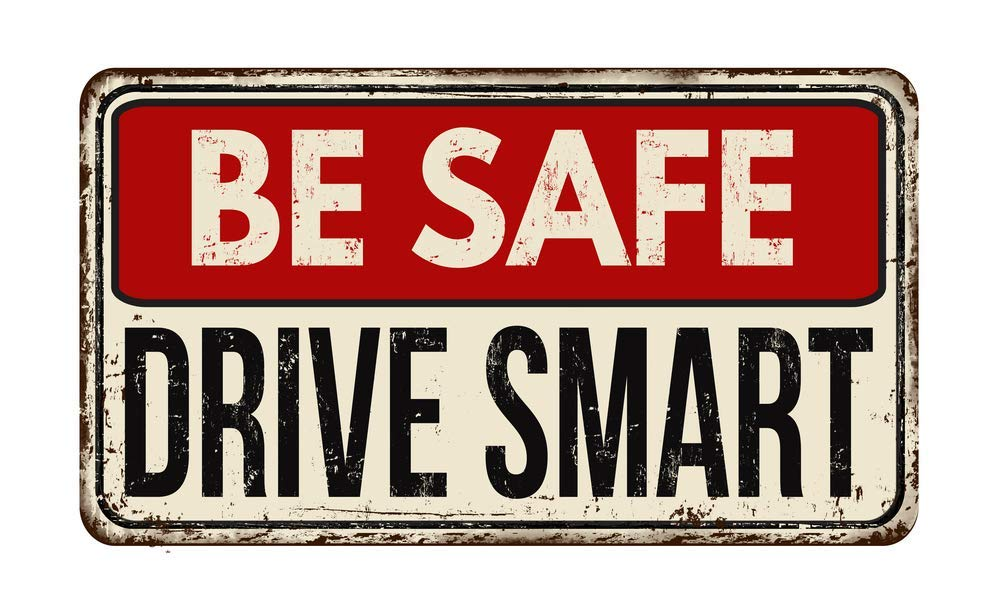

In [52]:
df=pd.read_csv('/content/drive/MyDrive/Colab Notebooks/PROJECT/EDA/US Accidents/US_Accidents_Dec20.csv')

In [53]:
df

,ID,Severity,Start_Time,End_Time,Start_Lat,Start_Lng,End_Lat,End_Lng,Distance(mi),Description,Number,Street,Side,City,County,State,Zipcode,Country,Timezone,Airport_Code,Weather_Timestamp,Temperature(F),Wind_Chill(F),Humidity(%),Pressure(in),Visibility(mi),Wind_Direction,Wind_Speed(mph),Precipitation(in),Weather_Condition,Amenity,Bump,Crossing,Give_Way,Junction,No_Exit,Railway,Roundabout,Station,Stop,Traffic_Calming,Traffic_Signal,Turning_Loop,Sunrise_Sunset,Civil_Twilight,Nautical_Twilight,Astronomical_Twilight
0,A-2716600,3,2016-02-08 00:37:08,2016-02-08 06:37:08,40.10891,-83.09286,40.11206,-83.03187,3.230,Between Sawmill Rd/Exit 20 and OH-315/Olentang...,NaN,Outerbelt E,R,Dublin,Franklin,OH,43017,US,US/Eastern,KOSU,2016-02-08 00:53:00,42.1,36.1,58.0,29.76,10.0,SW,10.4,0.00,Light Rain,False,False,False,False,False,False,False,False,False,False,False,False,False,Night,Night,Night,Night
1,A-2716601,2,2016-02-08 05:56:20,2016-02-08 11:56:20,39.86542,-84.06280,39.86501,-84.04873,0.747,At OH-4/OH-235/Exit 41 - Accident.,NaN,I-70 E,R,Dayton,Montgomery,OH,45424,US,US/Eastern,KFFO,2016-02-08 05:58:00,36.9,NaN,91.0,29.68,10.0,Calm,NaN,0.02,Light Rain,False,False,False,False,False,False,False,False,False,False,False,False,False,Night,Night,Night,Night
2,A-2716602,2,2016-02-08 06:15:39,2016-02-08 12:15:39,39.10266,-84.52468,39.10209,-84.52396,0.055,At I-71/US-50/Exit 1 - Accident.,NaN,I-75 S,R,Cincinnati,Hamilton,OH,45203,US,US/Eastern,KLUK,2016-02-08 05:53:00,36.0,NaN,97.0,29.70,10.0,Calm,NaN,0.02,Overcast,False,False,False,False,True,False,False,False,False,False,False,False,False,Night,Night,Night,Day
3,A-2716603,2,2016-02-08 06:15:39,2016-02-08 12:15:39,39.10148,-84.52341,39.09841,-84.52241,0.219,At I-71/US-50/Exit 1 - Accident.,NaN,US-50 E,R,Cincinnati,Hamilton,OH,45202,US,US/Eastern,KLUK,2016-02-08 05:53:00,36.0,NaN,97.0,29.70,10.0,Calm,NaN,0.02,Overcast,False,False,False,False,True,False,False,False,False,False,False,False,False,Night,Night,Night,Day
4,A-2716604,2,2016-02-08 06:51:45,2016-02-08 12:51:45,41.06213,-81.53784,41.06217,-81.53547,0.123,At Dart Ave/Exit 21 - Accident.,NaN,I-77 N,R,Akron,Summit,OH,44311,US,US/Eastern,KAKR,2016-02-08 06:54:00,39.0,NaN,55.0,29.65,10.0,Calm,NaN,NaN,Overcast,False,False,False,False,False,False,False,False,False,False,False,False,False,Night,Night,Day,Day
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1516059,A-4239402,2,2019-08-23 18:03:25,2019-08-23 18:32:01,34.00248,-117.37936,33.99888,-117.37094,0.543,At Market St - Accident.,NaN,Pomona Fwy E,R,Riverside,Riverside,CA,92501,US,US/Pacific,KRAL,2019-08-23 17:53:00,86.0,86.0,40.0,28.92,10.0,W,13.0,0.00,Fair,False,False,False,False,False,False,False,False,False,False,False,False,False,Day,Day,Day,Day
1516060,A-4239403,2,2019-08-23 19:11:30,2019-08-23 19:38:23,32.76696,-117.14806,32.76555,-117.15363,0.338,At Camino Del Rio/Mission Center Rd - Accident.,NaN,I-8 W,R,San Diego,San Diego,CA,92108,US,US/Pacific,KMYF,2019-08-23 18:53:00,70.0,70.0,73.0,29.39,10.0,SW,6.0,0.00,Fair,False,False,False,False,False,False,False,False,False,False,False,False,False,Day,Day,Day,Day
1516061,A-4239404,2,2019-08-23 19:00:21,2019-08-23 19:28:49,33.77545,-117.84779,33.77740,-117.85727,0.561,At Glassell St/Grand Ave - Accident. in the ri...,NaN,Garden Grove Fwy,R,Orange,Orange,CA,92866,US,US/Pacific,KSNA,2019-08-23 18:53:00,73.0,73.0,64.0,29.74,10.0,SSW,10.0,0.00,Partly Cloudy,False,False,False,False,True,False,False,False,False,False,False,False,False,Day,Day,Day,Day
1516062,A-4239405,2,2019-08-23 19:00:21,2019-08-23 19:29:42,33.99246,-118.40302,33.98311,-118.39565,0.772,At CA-90/Marina Fwy/Jefferson Blvd - Accident.,NaN,San Diego Fwy S,R,Culver City,Los Angeles,CA,90230,US,US/Pacific,KSMO,2019-08-23 18:51:00,71.0,71.0,81.0,29.62,10.0,SW,8.0,0.00,Fair,False,False,False,False,False,False,False,False,False,False,False,False,F

In [54]:
df.shape

(1516064, 47)

In [55]:
df.columns

Index(['ID', 'Severity', 'Start_Time', 'End_Time', 'Start_Lat', 'Start_Lng',
       'End_Lat', 'End_Lng', 'Distance(mi)', 'Description', 'Number', 'Street',
       'Side', 'City', 'County', 'State', 'Zipcode', 'Country', 'Timezone',
       'Airport_Code', 'Weather_Timestamp', 'Temperature(F)', 'Wind_Chill(F)',
       'Humidity(%)', 'Pressure(in)', 'Visibility(mi)', 'Wind_Direction',
       'Wind_Speed(mph)', 'Precipitation(in)', 'Weather_Condition', 'Amenity',
       'Bump', 'Crossing', 'Give_Way', 'Junction', 'No_Exit', 'Railway',
       'Roundabout', 'Station', 'Stop', 'Traffic_Calming', 'Traffic_Signal',
       'Turning_Loop', 'Sunrise_Sunset', 'Civil_Twilight', 'Nautical_Twilight',
       'Astronomical_Twilight'],
      dtype='object')

In [56]:
df.info

<bound method DataFrame.info of                 ID  Severity  ... Nautical_Twilight Astronomical_Twilight
0        A-2716600         3  ...             Night                 Night
1        A-2716601         2  ...             Night                 Night
2        A-2716602         2  ...             Night                   Day
3        A-2716603         2  ...             Night                   Day
4        A-2716604         2  ...               Day                   Day
...            ...       ...  ...               ...                   ...
1516059  A-4239402         2  ...               Day                   Day
1516060  A-4239403         2  ...               Day                   Day
1516061  A-4239404         2  ...               Day                   Day
1516062  A-4239405         2  ...               Day                   Day
1516063  A-4239406         2  ...               Day                   Day

[1516064 rows x 47 columns]>

In [57]:
df.describe()

,Severity,Start_Lat,Start_Lng,End_Lat,End_Lng,Distance(mi),Number,Temperature(F),Wind_Chill(F),Humidity(%),Pressure(in),Visibility(mi),Wind_Speed(mph),Precipitation(in)
count,1.516064e+06,1.516064e+06,1.516064e+06,1.516064e+06,1.516064e+06,1.516064e+06,4.699690e+05,1.473031e+06,1.066748e+06,1.470555e+06,1.479790e+06,1.471853e+06,1.387202e+06,1.005515e+06
mean,2.238630e+00,3.690056e+01,-9.859919e+01,3.690061e+01,-9.859901e+01,5.872617e-01,8.907533e+03,5.958460e+01,5.510976e+01,6.465960e+01,2.955495e+01,9.131755e+00,7.630812e+00,8.477855e-03
std,6.081481e-01,5.165653e+00,1.849602e+01,5.165629e+00,1.849590e+01,1.632659e+00,2.242190e+04,1.827316e+01,2.112735e+01,2.325986e+01,1.016756e+00,2.889112e+00,5.637364e+00,1.293168e-01
min,1.000000e+00,2.457022e+01,-1.244976e+02,2.457011e+01,-1.244978e+02,0.000000e+00,0.000000e+00,-8.900000e+01,-8.900000e+01,1.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
25%,2.000000e+00,3.385422e+01,-1.182076e+02,3.385420e+01,-1.182077e+02,0.000000e+00,1.212000e+03,4.700000e+01,4.080000e+01,4.800000e+01,2.944000e+01,1.000000e+01,4.600000e+00,0.000000e+00
50%,2.000000e+00,3.735113e+01,-9.438100e+01,3.735134e+01,-9.437987e+01,1.780000e-01,4.000000e+03,6.100000e+01,5.700000e+01,6.800000e+01,2.988000e+01,1.000000e+01,7.000000e+00,0.000000e+00
75%,2.000000e+00,4.072593e+01,-8.087469e+01,4.072593e+01,-8.087449e+01,5.940000e-01,1.010000e+04,7.300000e+01,7.100000e+01,8.400000e+01,3.004000e+01,1.000000e+01,1.040000e+01,0.000000e+00
max,4.000000e+00,4.900058e+01,-6.711317e+01,4.907500e+01,-6.710924e+01,1.551860e+02,9.999997e+06,1.706000e+02,1.130000e+02,1.000000e+02,5.804000e+01,1.400000e+02,9.840000e+02,2.400000e+01


In [58]:
df.isnull().sum() #Number of null values in each column 

ID                             0
Severity                       0
Start_Time                     0
End_Time                       0
Start_Lat                      0
Start_Lng                      0
End_Lat                        0
End_Lng                        0
Distance(mi)                   0
Description                    0
Number                   1046095
Street                         0
Side                           0
City                          83
County                         0
State                          0
Zipcode                      935
Country                        0
Timezone                    2302
Airport_Code                4248
Weather_Timestamp          30264
Temperature(F)             43033
Wind_Chill(F)             449316
Humidity(%)                45509
Pressure(in)               36274
Visibility(mi)             44211
Wind_Direction             41858
Wind_Speed(mph)           128862
Precipitation(in)         510549
Weather_Condition          44007
Amenity   

In [59]:
null_percentage=(df.isnull().sum()/df.shape[0]) *100 #percentage of null value in each column

In [60]:
null_percentage [null_percentage >10].keys() #there is only three column which is having null value > 10%

Index(['Number', 'Wind_Chill(F)', 'Precipitation(in)'], dtype='object')

In [61]:
df.City.unique()

array(['Dublin', 'Dayton', 'Cincinnati', ..., 'Succasunna', 'Valleyford',
       'American Fork-Pleasant Grove'], dtype=object)

In [62]:
len(df.City.unique()) #there are 10658 unique columns

10658

In [63]:
cities_by_accident = df.City.value_counts()
cities_by_accident

Los Angeles    39984
Miami          36233
Charlotte      22203
Houston        20843
Dallas         19497
               ...  
Huff               1
Coal City          1
Adamsburg          1
Frierson           1
Birch River        1
Name: City, Length: 10657, dtype: int64

In [64]:
cities_by_accident[:20]

Los Angeles     39984
Miami           36233
Charlotte       22203
Houston         20843
Dallas          19497
Sacramento      18431
Orlando         16169
Portland        14805
San Diego       14090
Minneapolis     12653
Atlanta         11854
Chicago         11507
Saint Paul      10084
Phoenix          9934
Raleigh          9516
San Jose         9362
Richmond         8472
Nashville        8381
Riverside        8201
Jacksonville     7815
Name: City, dtype: int64

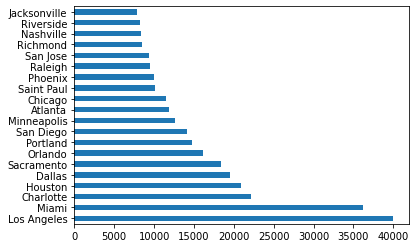

In [65]:
cities_by_accident[:20].plot(kind='barh')

In [66]:
df.Start_Time = pd.to_datetime(df.Start_Time)

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


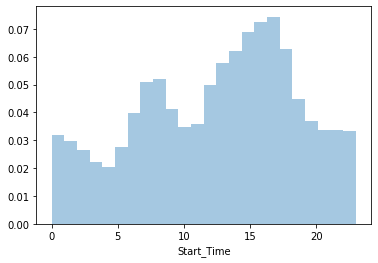

In [67]:
sns.distplot(df.Start_Time.dt.hour, bins=24, kde=False, norm_hist=True)

A high percentage of accidents occur between 6 am to 10 am (probably people in a hurry to get to work)

Next higest percentage is 3 pm to 6 pm.

In [68]:
sample_df = df.sample(int(0.1 * len(df)))

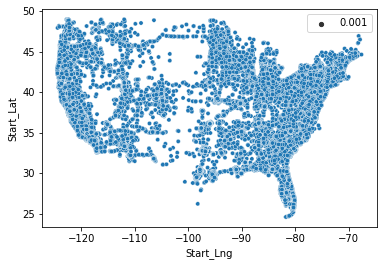

In [69]:
sns.scatterplot(x=sample_df.Start_Lng, y=sample_df.Start_Lat, size=0.001)

In [70]:
sample_df = df.sample(int(0.001 * len(df)))
lat_lon_pairs = list(zip(list(sample_df.Start_Lat), list(sample_df.Start_Lng)))

In [71]:
from folium.plugins import HeatMap
map = folium.Map()
HeatMap(lat_lon_pairs).add_to(map)
map

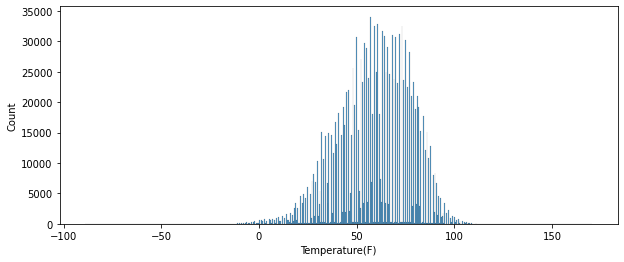

In [72]:
a4_dims = (10,4)
fig, ax = plt.subplots(figsize=a4_dims)
sns.histplot(df['Temperature(F)'])

In [73]:
# state wise temperature distribution
temp_state=df.groupby('State')['Temperature(F)'].mean().reset_index().sort_values(by = "Temperature(F)",ascending=False)
temp_state.head()

,State,Temperature(F)
8,FL,74.448646
2,AZ,74.095956
34,OK,69.499801
41,TX,67.228565
31,NV,66.301644


In [74]:
temp_state.mean()

Temperature(F)    54.433423
dtype: float64

In [75]:
temp_state.loc[temp_state['Temperature(F)'] <= 54.5, 'State_condition'] = 'Cold' 
temp_state.loc[temp_state['Temperature(F)'] > 54.5, 'State_condition'] = 'Hot' 

In [76]:
temp_state.head()

,State,Temperature(F),State_condition
8,FL,74.448646,Hot
2,AZ,74.095956,Hot
34,OK,69.499801,Hot
41,TX,67.228565,Hot
31,NV,66.301644,Hot


In [77]:
state_count=df.groupby('State').count().reset_index()
state_count_sort=state_count.sort_values(by = "ID",ascending=False)
state_count_sort=state_count_sort.iloc[:,[0,1]]
state_count_sort.head(5)

,State,ID
3,CA,448833
8,FL,153007
35,OR,87484
41,TX,75142
32,NY,60974


In [78]:
final_table=pd.merge(temp_state,state_count_sort,on='State')

In [79]:
final_table=final_table.sort_values(by = "ID",ascending=False)

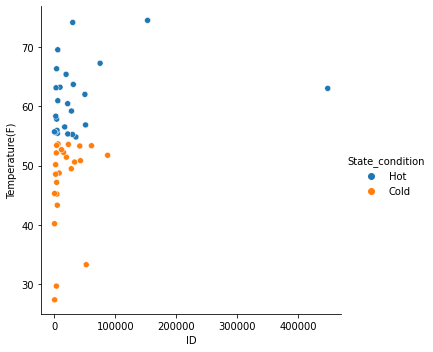

In [80]:
sns.relplot(x='ID',y='Temperature(F)',hue='State_condition',data=final_table)

From the top 15 accident prone state 9 of them are in hot area while 6 of them are in cool area.

In [81]:
times = pd.to_datetime(df.Start_Time)
times=df.groupby([times.dt.year]).count().sort_values(by = "ID",ascending=False).iloc[:,[0]]
times=times.reset_index()

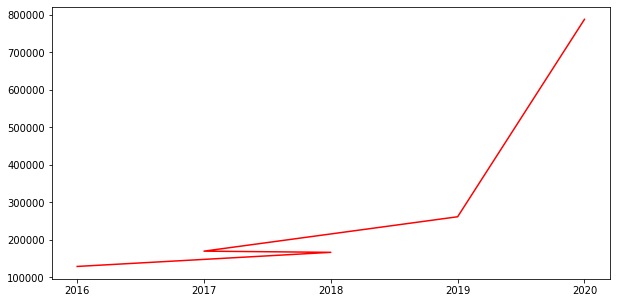

In [82]:
a4_dims = (10, 5)
fig, ax = plt.subplots(figsize=a4_dims)
x=times.Start_Time
y=times.ID
plt.plot(x, y, color='Red')
plt.xticks([2016,2017,2018,2019,2020])
plt.show()

**Conclusion**
   
   a) A high percentage of accidents occur between 6 am to 10 am (probably people in a hurry to get to work)

b) Next higest percentage is 3 pm to 6 pm.

c) Top 20 cities which is having most accident

'Los Angeles', 'Miami', 'Charlotte', 'Houston', 'Dallas', 'Sacramento',
       'Orlando', 'Portland', 'San Diego', 'Minneapolis', 'Atlanta', 'Chicago',
       'Saint Paul', 'Phoenix', 'Raleigh', 'San Jose', 'Richmond', 'Nashville',
       'Riverside', 'Jacksonville'

d) From the top 15 accident prone state 9 of them are in hot area while 6 of them are in cool area.

e) After 2019 there is high jump in accident